In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
team_stats = pd.read_csv("datasets/team_stats.csv")
standings = pd.read_csv("datasets/standings.csv")
fixtures = pd.read_csv("datasets/fixtures.csv")

In [76]:
# Ellenőrizzük, hogy biztosan léteznek-e a megfelelő oszlopok
print("Team stats oszlopok:")
print(team_stats.columns.tolist())
print("\nStandings oszlopok:")
print(standings.columns.tolist())

Team stats oszlopok:
['team', 'players', 'age', 'possession', 'goals', 'assists', 'penalty_kicks', 'penalty_kick_attempts', 'yellows', 'reds', 'expected_goals', 'expected_assists', 'progressive_carries', 'progressive_passes']

Standings oszlopok:
['rank', 'team', 'win', 'loss', 'draw', 'goals', 'conceded', 'points', 'last5', 'top_scorer', 'keeper']


In [77]:
# A modellhez használt 6 feature kiválasztása

features = [
    "goals",               # lőtt gólok
    "assists",             # gólpasszok
    "possession",          # labdabirtoklás
    "expected_goals",      # xG
    "expected_assists",    # xA
    "progressive_passes"   # előrehaladó passzok
]

X = team_stats[features]

# A feature sor megjelenítése
X



,goals,assists,possession,expected_goals,expected_assists,progressive_passes
0,65,53,56.8,57.6,43.2,1764
1,56,45,51.0,55.7,41.5,1326
2,55,39,48.1,62.4,42.6,1438
3,64,43,47.8,57.6,41.3,1318
4,60,40,52.0,56.5,39.7,1478
5,60,46,57.3,66.7,51.6,1573
6,48,37,43.1,58.7,44.7,1140
7,38,26,41.1,40.6,31.5,1027
8,53,44,52.4,47.8,36.9,1524
9,34,25,40.5,33.6,23.7,896


In [78]:
#Ellenőrzés
print("Használt feature-ök száma:", len(features))
print("Feature nevek:", features)



Használt feature-ök száma: 6
Feature nevek: ['goals', 'assists', 'possession', 'expected_goals', 'expected_assists', 'progressive_passes']


In [79]:
from scipy import stats
import numpy as np

# X az előző lépésben létrehozott feature mátrix
print("Eredeti adatméret:", X.shape)

# Z-score kiszámítása
z_scores = np.abs(stats.zscore(X))

# Küszöb: 3 standard deviáció
threshold = 3

# Boolean mask, ahol minden sor igaz/hamis attól függően,
# hogy VAN-E benne 3 feletti z-score érték
mask = (z_scores < threshold).all(axis=1)

# Outlierek eltávolítása
X_clean = X[mask]

print("Outlierek eltávolítása után:", X_clean.shape)

X_clean.head()


Eredeti adatméret: (20, 6)
Outlierek eltávolítása után: (20, 6)


,goals,assists,possession,expected_goals,expected_assists,progressive_passes
0,65,53,56.8,57.6,43.2,1764
1,56,45,51.0,55.7,41.5,1326
2,55,39,48.1,62.4,42.6,1438
3,64,43,47.8,57.6,41.3,1318
4,60,40,52.0,56.5,39.7,1478


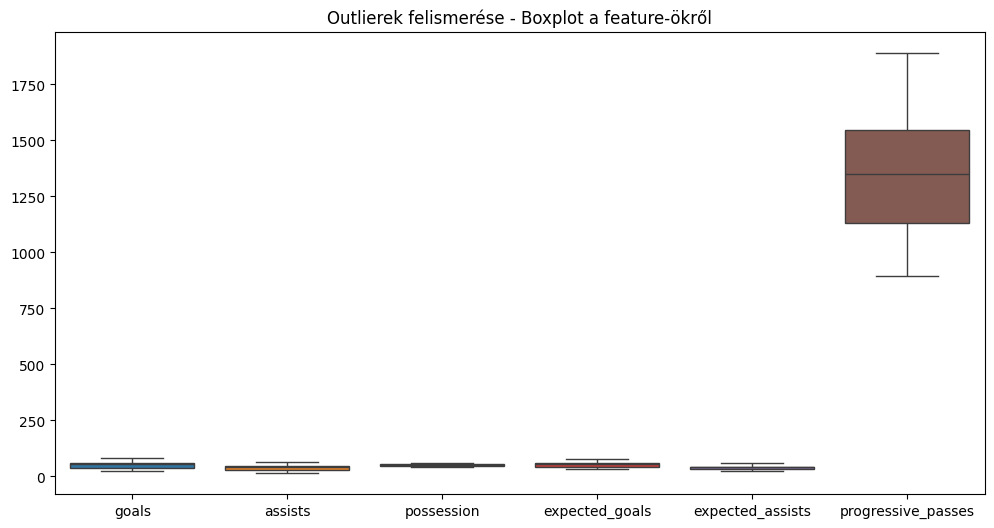

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=X_clean)
plt.title("Outlierek felismerése - Boxplot a feature-ökről")
plt.xticks()
plt.show()


In [81]:
# Új származtatott feature: gólhatékonyság (goals / expected_goals)
team_stats["goal_efficiency"] = team_stats["goals"] / team_stats["expected_goals"]

# Az új oszlop megtekintése
team_stats[["team", "goals", "expected_goals", "goal_efficiency"]]


,team,goals,expected_goals,goal_efficiency
0,Arsenal,65,57.6,1.128472
1,Aston Villa,56,55.7,1.005386
2,Bournemouth,55,62.4,0.881410
3,Brentford,64,57.6,1.111111
4,Brighton,60,56.5,1.061947
5,Chelsea,60,66.7,0.899550
6,Crystal Palace,48,58.7,0.817717
7,Everton,38,40.6,0.935961
8,Fulham,53,47.8,1.108787
9,Ipswich Town,34,33.6,1.011905


In [82]:
# A pontátlag kiszámítása
avg_points = standings["points"].mean()

# Célváltozó létrehozása: 1 = átlag felett teljesített, 0 = átlag alatt
standings["target"] = (standings["points"] > avg_points).astype(int)

# Ellenőrzés
standings[["team", "points", "target"]]


,team,points,target
0,Liverpool,83,1
1,Arsenal,71,1
2,Manchester City,68,1
3,Newcastle Utd,66,1
4,Chelsea,66,1
5,Aston Villa,66,1
6,Nott'ham Forest,65,1
7,Brighton,58,1
8,Brentford,55,1
9,Fulham,54,1


In [83]:
# Csapatnév alapján összekapcsoljuk az adatokat (inner join)
merged = team_stats.merge(standings[["team", "target"]], on="team", how="inner")

# Feature mátrix (X) és target (y)
X = merged[features]   # features: a korábban létrehozott lista
y = merged["target"]

# Ellenőrzés
print("X shape:", X.shape)
print("y shape:", y.shape)
merged[["team"] + features + ["target"]].head()


X shape: (20, 6)
y shape: (20,)


,team,goals,assists,possession,expected_goals,expected_assists,progressive_passes,target
0,Arsenal,65,53,56.8,57.6,43.2,1764,1
1,Aston Villa,56,45,51.0,55.7,41.5,1326,1
2,Bournemouth,55,39,48.1,62.4,42.6,1438,1
3,Brentford,64,43,47.8,57.6,41.3,1318,1
4,Brighton,60,40,52.0,56.5,39.7,1478,1


In [84]:
from sklearn.preprocessing import StandardScaler

# StandardScaler példány létrehozása
scaler = StandardScaler()

# Csak a feature-öket skálázzuk, a targetet nem!
X_scaled = scaler.fit_transform(X)




In [85]:
from sklearn.model_selection import train_test_split

# Train-test split (80% tanítás, 20% teszt)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16, 6)
X_test shape: (4, 6)
y_train shape: (16,)
y_test shape: (4,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')   # bináris osztályozás
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


c:\Users\Martin\Desktop\EKKE\Beadandó gépi tanulás és adattudomány\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)



In [88]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,   # 20% a trainből validáció lesz
    epochs=50,
    batch_size=4,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.3333 - loss: 0.7411 - val_accuracy: 0.5000 - val_loss: 0.6409
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3333 - loss: 0.6874 - val_accuracy: 0.5000 - val_loss: 0.5915
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5833 - loss: 0.6420 - val_accuracy: 0.5000 - val_loss: 0.5536
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6667 - loss: 0.6061 - val_accuracy: 0.5000 - val_loss: 0.5214
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7500 - loss: 0.5676 - val_accuracy: 0.7500 - val_loss: 0.4948
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.5348 - val_accuracy: 0.7500 - val_loss: 0.4720
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.5010 - val_accuracy: 0.7500 - val_loss: 0.4526
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.4729 - val_accuracy: 0.7500 - val_loss: 0.4402
Epoch 9/50


In [89]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5000 - loss: 1.9121
Test accuracy: 0.5000
